In [ ]:
!pip install transformers

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# because the dataset is int tsv format we have to use delimeter.
df = pd.read_json('/content/drive/MyDrive/UNT/5290 Reviews Project/Musical_Instruments.json', lines=True)
df = df.head(800)
test = df.tail(200)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/UNT/5290 Reviews Project/output.csv')
df2 = df2.head(800)
test2 = df2.tail(200)

In [ ]:
# creating a copy so we don't messed up our original dataset.
data=df.copy()
data.head(10)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,90,False,"08 9, 2004",AXHY24HWOF184,0470536454,{'Format:': ' Paperback'},Bendy,Crocheting for Dummies by Karen Manthey & Susa...,Terrific Book for Learning the Art of Crochet,1092009600,NaN
1,4,2,True,"04 6, 2017",A29OWR79AM796H,0470536454,{'Format:': ' Hardcover'},Amazon Customer,Very helpful...,Four Stars,1491436800,NaN
2,5,NaN,True,"03 14, 2017",AUPWU27A7X5F6,0470536454,{'Format:': ' Paperback'},Amazon Customer,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,Five Stars,1489449600,NaN
3,4,NaN,True,"02 14, 2017",A1N69A47D4JO6K,0470536454,{'Format:': ' Paperback'},Christopher Burnett,My girlfriend use quite often,Four Stars,1487030400,NaN
4,5,NaN,True,"01 29, 2017",AHTIQUMVCGBFJ,0470536454,{'Format:': ' Paperback'},Amazon Customer,Arrived as described. Very happy.,Very happy.,1485648000,NaN
5,5,NaN,True,"01 4, 2017",A1J8LQ7HVLR9GU,0470536454,{'Format:': ' Kindle Edition'},Iheartmanatees,Love the Dummies Series. Never fails.,Love the Dummies Series,1483488000,NaN
6,5,NaN,True,"01 2, 2017",ABVTZ63S6GOWF,0470536454,{'Format:': ' Paperback'},D. Eva,Good book.,Five Stars,1483315200,NaN
7,4,NaN,True,"12 21, 2016",A2HX9NFBXGSWRW,0470536454,{'Format:': ' Paperback'},Stoeffels,Just started reading it. Love the charts & cau...,Clear. Good reminders.,1482278400,NaN
8,4,NaN,True,"12 20, 2016",AP1TQR64HQRCI,0470536454,{'Format:': ' Paperback'},nan ekelund,GREAT book,Four Stars,1482192000,NaN
9,5,NaN,True,"12 15, 2016",A37FC9MED20AO,0470536454,{'Format:': ' Paperback'},Jacqueline Bryant,this is a very helpful book.,Five Stars,1481760000,NaN


In [ ]:
data2=df2.copy()
data2["label"] = '1'
data2.head(10)

,reviewText,label
0,This case is a great value. I bought this for...,1
1,The best!,1
2,I've put this windscreen for over 6 months an...,1
3,Just what I needed.,1
4,Nice for the price.,1
5,This guitar is built like a tank and is very ...,1
6,I bought this guitar because of the price of ...,1
7,Item as expected.,1
8,I bought this item and it works great. The on...,1
9,This is a great product. It has a very good ...,1


In [ ]:
data.drop(['overall',	'vote',	'verified',	'reviewTime',	'reviewerID',	'asin',	'style',	'reviewerName',	'summary'	,'unixReviewTime' ,	'image'],axis=1,inplace=True)
data["label"] = '0'
data.head()

,reviewText,label
0,Crocheting for Dummies by Karen Manthey & Susa...,0
1,Very helpful...,0
2,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,0
3,My girlfriend use quite often,0
4,Arrived as described. Very happy.,0


In [ ]:
data.dropna(how='all')

,reviewText,label
0,Crocheting for Dummies by Karen Manthey & Susa...,0
1,Very helpful...,0
2,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,0
3,My girlfriend use quite often,0
4,Arrived as described. Very happy.,0
...,...,...
795,use it,0
796,I saw people learning the uke instantly at my ...,0
797,I didn't think anyone could screw up a ukulele...,0
798,I am really happy with this started pack. It h...,0


In [ ]:
data = data.append(data2, ignore_index= True )
data

,reviewText,label
0,Crocheting for Dummies by Karen Manthey & Susa...,0
1,Very helpful...,0
2,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,0
3,My girlfriend use quite often,0
4,Arrived as described. Very happy.,0
...,...,...
1595,This is a very good quality product. The soun...,1
1596,This case is well made and it has a price to it.,1
1597,"This is a great value, and it was easy to fin...",1
1598,"I am using these to set up. They work well, b...",1


In [ ]:
sentences=data.reviewText.values
labels = data.label.values
print(labels.shape)
print(sentences.shape)

(1600,)
(1600,)


In [ ]:
from transformers import BertTokenizer
# using the low level BERT for our task.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Printing the original sentence.
print(' Original: ', sentences[0])

# Printing the tokenized sentence in form of list.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  Crocheting for Dummies by Karen Manthey & Susan Brittain is a wonderfully thorough and very informative book for anyone wanting to learn to crochet and or wanting to freshen up their skills.

The book reads like a storybook in paragraph form.  Everything is explained in great detail from choosing yarns and hooks, to how to work a large array of crochet stitches, to how to read a pattern, right down to how to care for ones crocheted items.

The stitch drawings are clear and expertly done making learning new stitches so much easier.

The book has both a contents page and an index for easy referral.  I especially liked the fact that an index was included.  So many crochet books do not include this.  The index makes it very easy to find information on a particular topic quickly.

The recommendations for people just learning to crochet are fantastic.  This book wasn't out when I learned to crochet and I learned the hard way about many of the pit falls this book helps one to avoi

In [ ]:
input_ids = []
for sent in sentences:
    # so basically encode tokenizing , mapping sentences to thier token ids after adding special tokens.
    encoded_sent = tokenizer.encode(
                        str(sent),                  # Sentence which are encoding.
                        add_special_tokens = True,
                        truncation = True ,
                        max_length = 608 # Adding special tokens '[CLS]' and '[SEP]'

                         )
    
 
    input_ids.append(encoded_sent)
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])    

Original:  Crocheting for Dummies by Karen Manthey & Susan Brittain is a wonderfully thorough and very informative book for anyone wanting to learn to crochet and or wanting to freshen up their skills.

The book reads like a storybook in paragraph form.  Everything is explained in great detail from choosing yarns and hooks, to how to work a large array of crochet stitches, to how to read a pattern, right down to how to care for ones crocheted items.

The stitch drawings are clear and expertly done making learning new stitches so much easier.

The book has both a contents page and an index for easy referral.  I especially liked the fact that an index was included.  So many crochet books do not include this.  The index makes it very easy to find information on a particular topic quickly.

The recommendations for people just learning to crochet are fantastic.  This book wasn't out when I learned to crochet and I learned the hard way about many of the pit falls this book helps one to avoid

In [ ]:
from keras.preprocessing.sequence import pad_sequences

MAX_LEN = 64

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN , truncating="post", padding="post")


In [ ]:
attention_masks = []

for sent in input_ids:
    
    # Generating attention mask for sentences.
    #   - when there is 0 present as token id we are going to set mask as 0.
    #   - we are going to set mask 1 for all non-zero positive input id.
    att_mask = [int(token_id > 0) for token_id in sent]
    
   
    attention_masks.append(att_mask)

In [ ]:
from sklearn.model_selection import train_test_split
import torch
import torchvision
import numpy as np 
# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)
print(train_labels.dtype)
train_labels = train_labels.astype(np.float32)
validation_labels = validation_labels.astype(np.float32)
#changing the numpy arrays into tensors for working on GPU. 


# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels).type(torch.long)
validation_labels = torch.tensor(validation_labels).type(torch.long)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Deciding the batch size for training.

batch_size = 1
print(train_inputs.size())
print(train_masks.size())

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)


# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

object
torch.Size([1440, 64])
torch.Size([1440, 64])


In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig


# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
    return_dict=True
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8 
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random
from torch.nn import functional as F
import torch.nn as nn
# Loss and optimizer
criterion = nn.BCELoss()
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.   Loss: {:}'.format(step, len(train_dataloader), elapsed, total_loss))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(
            b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask,
            labels = b_labels
        )

        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of  1,440.    Elapsed: 0:00:05.   Loss: 35.259660854935646
  Batch    80  of  1,440.    Elapsed: 0:00:10.   Loss: 62.698383167386055
  Batch   120  of  1,440.    Elapsed: 0:00:15.   Loss: 90.40916799753904
  Batch   160  of  1,440.    Elapsed: 0:00:20.   Loss: 108.57296766154468
  Batch   200  of  1,440.    Elapsed: 0:00:25.   Loss: 134.48613845417276
  Batch   240  of  1,440.    Elapsed: 0:00:31.   Loss: 150.7231056872988
  Batch   280  of  1,440.    Elapsed: 0:00:36.   Loss: 170.4160819313256
  Batch   320  of  1,440.    Elapsed: 0:00:41.   Loss: 195.51072293822654
  Batch   360  of  1,440.    Elapsed: 0:00:46.   Loss: 206.36657705437392
  Batch   400  of  1,440.    Elapsed: 0:00:51.   Loss: 237.4117173505947
  Batch   440  of  1,440.    Elapsed: 0:00:56.   Loss: 262.0179202008876
  Batch   480  of  1,440.    Elapsed: 0:01:01.   Loss: 276.382289016532
  Batch   520  of  1,440.    Elapsed: 0:01:06.   Loss: 286.13375305209775
  

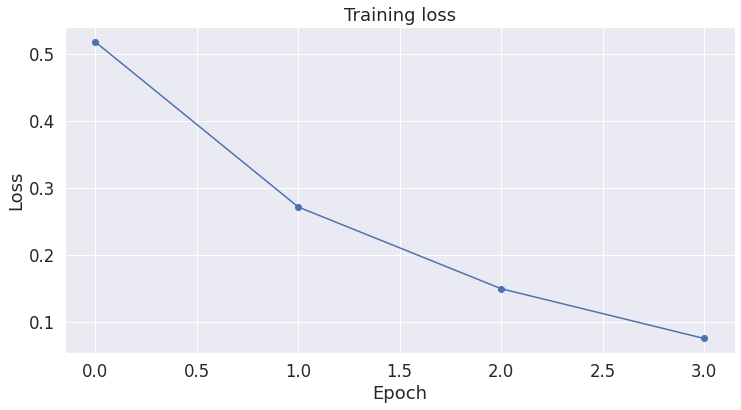

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [ ]:
import pandas as pd
testData=test.copy()
testData2=test2.copy()
testData2["label"] = '1'
testData.drop(['overall',	'vote',	'verified',	'reviewTime',	'reviewerID',	'asin',	'style',	'reviewerName',	'summary'	,'unixReviewTime' ,	'image'],axis=1,inplace=True)
testData["label"] = '0'
testData.dropna(how='all')
# Load the dataset into a pandas dataframe.
testData["label"] = pd.to_numeric(testData["label"], downcast="float")
testData2["label"] = pd.to_numeric(testData2["label"], downcast="float")
df = testData.append(testData2, ignore_index= True )


# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.reviewText.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
labels = labels.astype(np.float32)
prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Token indices sequence length is longer than the specified maximum sequence length for this model (1261 > 512). Running this sequence through the model will result in indexing errors


Number of test sentences: 400



In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 400 test sentences...
    DONE.


In [ ]:
print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

Positive samples: 200 of 400 (50.00%)


In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

MCC: 0.966
